In [1]:

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.tools import eval_measures

In [2]:
properatti_df_bsas=pd.read_csv("./tp2_properati.csv", sep=",", encoding='utf-8')
properatti_df_bsas.sample(5)

,Unnamed: 0,barrio,price_usd_per_m2,surface_total_clean,rooms_clean,precios_nuevos,precios_aprox_usd_clean,amenities,estacionamiento,sum,pileta,parrilla,gimnasio,lavadero,solarium,quincho,baulera,terraza
13515,51995,Barracas,NaN,762.0,3.0,NaN,NaN,True,False,False,False,True,False,False,False,False,False,True
29962,116377,Palermo,NaN,291.0,3.0,250000.0,250000.0,True,False,False,False,False,False,True,False,False,False,False
17462,66715,Belgrano,3214.285714,112.0,4.0,360000.0,360000.0,True,False,False,False,False,False,False,False,False,False,True
10346,40485,NaN,NaN,551.0,4.0,NaN,NaN,True,False,False,False,False,False,True,False,False,False,False
15655,60049,Palermo,3529.397059,68.0,3.0,239999.0,239999.0,True,True,True,True,True,False,False,False,False,False,False


In [3]:
lista=[]
for col in properatti_df_bsas.columns:
    lista.append(col)
print(lista)

['Unnamed: 0', 'barrio', 'price_usd_per_m2', 'surface_total_clean', 'rooms_clean', 'precios_nuevos', 'precios_aprox_usd_clean', 'amenities', 'estacionamiento', 'sum', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza']


In [4]:
properatti_df_bsas=properatti_df_bsas*1
properatti_df_bsas.sample(5)

,Unnamed: 0,barrio,price_usd_per_m2,surface_total_clean,rooms_clean,precios_nuevos,precios_aprox_usd_clean,amenities,estacionamiento,sum,pileta,parrilla,gimnasio,lavadero,solarium,quincho,baulera,terraza
22338,82910,Belgrano,2981.617647,136.0,3.0,405500.0,405500.0,1,1,1,1,1,0,0,1,0,0,0
28935,111790,Monserrat,1955.555556,54.0,3.0,105600.0,105600.0,1,0,0,1,0,0,0,0,0,0,0
10516,41139,Palermo,NaN,9.0,5.0,380000.0,380000.0,0,0,0,0,0,0,0,0,0,0,0
13528,52023,Tribunales,1098.901099,91.0,3.0,100000.0,100000.0,0,0,0,0,0,0,0,0,0,0,0
23721,87458,Boca,942.307692,104.0,3.0,98000.0,98000.0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
properatti_df_bsas.shape

(31942, 18)

In [6]:
properatti_df_bsas.isna().sum()

Unnamed: 0                    0
barrio                     1294
price_usd_per_m2           8819
surface_total_clean         149
rooms_clean                 177
precios_nuevos             2899
precios_aprox_usd_clean    2899
amenities                     0
estacionamiento               0
sum                           0
pileta                        0
parrilla                      0
gimnasio                      0
lavadero                      0
solarium                      0
quincho                       0
baulera                       0
terraza                       0
dtype: int64

In [7]:
llenado_nulos=properatti_df_bsas[properatti_df_bsas["price_usd_per_m2"].isnull()]
llenado_nulos.sample(4)

,Unnamed: 0,barrio,price_usd_per_m2,surface_total_clean,rooms_clean,precios_nuevos,precios_aprox_usd_clean,amenities,estacionamiento,sum,pileta,parrilla,gimnasio,lavadero,solarium,quincho,baulera,terraza
450,1929,Belgrano,NaN,152.0,3.0,550000.0,550000.0,1,0,0,0,0,0,1,0,0,0,0
23150,86110,Villa Urquiza,NaN,146.0,4.0,NaN,NaN,1,0,1,1,1,1,0,0,0,0,0
7125,27412,Caballito,NaN,544.0,5.0,255000.0,255000.0,1,1,0,0,0,0,1,0,0,1,1
17257,65659,Recoleta,NaN,42.0,2.0,NaN,NaN,1,0,1,1,0,1,1,0,0,0,0


In [8]:
mask_precio=llenado_nulos[llenado_nulos["precios_nuevos"].notnull()]

In [9]:
mask_precio.head(4)

,Unnamed: 0,barrio,price_usd_per_m2,surface_total_clean,rooms_clean,precios_nuevos,precios_aprox_usd_clean,amenities,estacionamiento,sum,pileta,parrilla,gimnasio,lavadero,solarium,quincho,baulera,terraza
2,3,Liniers,NaN,290.0,3.0,95000.00000,95000.00,0,0,0,0,0,0,0,0,0,0,0
24,97,San Telmo,NaN,75.0,1.0,80693.70093,79851.93,0,1,0,0,0,0,0,0,0,0,0
30,120,Belgrano,NaN,290.0,3.0,178000.00000,178000.00,1,1,0,0,0,0,1,0,0,0,0
32,137,Colegiales,NaN,133.0,6.0,249000.00000,249000.00,1,0,0,0,0,0,0,0,0,0,1


In [10]:
mask_precio.shape

(5920, 18)

In [11]:
nonulos=mask_precio[mask_precio["surface_total_clean"].notnull()]
nonulos.isna().sum()

Unnamed: 0                    0
barrio                      115
price_usd_per_m2           5812
surface_total_clean           0
rooms_clean                   3
precios_nuevos                0
precios_aprox_usd_clean       0
amenities                     0
estacionamiento               0
sum                           0
pileta                        0
parrilla                      0
gimnasio                      0
lavadero                      0
solarium                      0
quincho                       0
baulera                       0
terraza                       0
dtype: int64

In [12]:
precio_n_por_m2=nonulos["precios_nuevos"]/nonulos["surface_total_clean"]
print(precio_n_por_m2.sample(4))
print(precio_n_por_m2.shape[0])

410      1800.000000
16530    1544.444444
18828     429.553265
11314    1917.808219
dtype: float64
5812


In [13]:
properatti_df_bsas["price_usd_per_m2"] = properatti_df_bsas["price_usd_per_m2"].fillna(precio_n_por_m2.iloc[:])

In [14]:
properatti_df_bsas.isna().sum()

Unnamed: 0                    0
barrio                     1294
price_usd_per_m2           3007
surface_total_clean         149
rooms_clean                 177
precios_nuevos             2899
precios_aprox_usd_clean    2899
amenities                     0
estacionamiento               0
sum                           0
pileta                        0
parrilla                      0
gimnasio                      0
lavadero                      0
solarium                      0
quincho                       0
baulera                       0
terraza                       0
dtype: int64

In [15]:
properatti_df_bsas.iloc[15522,:]

Unnamed: 0                     59535
barrio                         Nunez
price_usd_per_m2           441.37931
surface_total_clean            290.0
rooms_clean                      3.0
precios_nuevos              128000.0
precios_aprox_usd_clean     128000.0
amenities                          0
estacionamiento                    0
sum                                0
pileta                             0
parrilla                           0
gimnasio                           0
lavadero                           0
solarium                           0
quincho                            0
baulera                            0
terraza                            0
Name: 15522, dtype: object

In [16]:
#Se llenaron 5819 campos de la columna price_usd_per_m2
# se elimina la columna precios_aprox_usd_clean por encontrarse repetida
properatti_df_bsas=properatti_df_bsas.drop(labels='precios_aprox_usd_clean', axis=1)

In [17]:
properatti_df_bsas.sample(4)

,Unnamed: 0,barrio,price_usd_per_m2,surface_total_clean,rooms_clean,precios_nuevos,amenities,estacionamiento,sum,pileta,parrilla,gimnasio,lavadero,solarium,quincho,baulera,terraza
2143,10049,Villa Crespo,2944.444444,27.0,1.0,79500.0,0,0,0,0,0,0,0,0,0,0,0
14175,55100,Barrio Norte,2838.427948,229.0,5.0,650000.0,1,1,0,0,0,0,0,0,0,1,0
6181,25697,San Cristobal,4871.794872,39.0,1.0,190000.0,1,0,1,0,1,0,1,1,0,0,0
15727,60350,San Telmo,2382.307692,39.0,1.0,92910.0,1,1,0,1,1,1,1,1,0,1,0


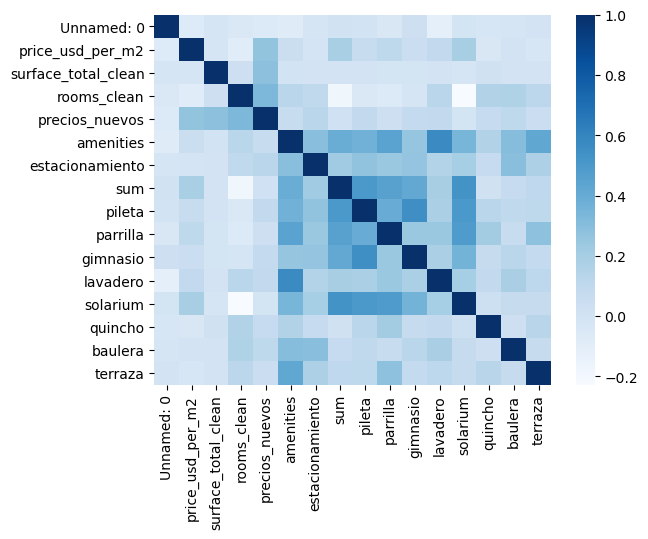

In [18]:
#Se busca alguna tendencia de correlacion para poder llenar las columnas faltantes
import seaborn as sns

correlation1=properatti_df_bsas.select_dtypes("number").corr()
sns.heatmap(correlation1, cmap="Blues")

In [19]:
print(correlation1.price_usd_per_m2)

Unnamed: 0            -0.066798
price_usd_per_m2       1.000000
surface_total_clean   -0.017344
rooms_clean           -0.087038
precios_nuevos         0.270195
amenities              0.051941
estacionamiento       -0.009974
sum                    0.192146
pileta                 0.070507
parrilla               0.109906
gimnasio               0.049274
lavadero               0.098650
solarium               0.196630
quincho               -0.035450
baulera               -0.001266
terraza               -0.028859
Name: price_usd_per_m2, dtype: float64


In [20]:
print(correlation1.precios_nuevos)


Unnamed: 0            -0.057351
price_usd_per_m2       0.270195
surface_total_clean    0.288533
rooms_clean            0.333027
precios_nuevos         1.000000
amenities              0.071491
estacionamiento        0.131545
sum                    0.025234
pileta                 0.093850
parrilla               0.039300
gimnasio               0.086107
lavadero               0.092133
solarium              -0.003342
quincho                0.080883
baulera                0.110101
terraza                0.047250
Name: precios_nuevos, dtype: float64


In [21]:
print(correlation1.surface_total_clean)

Unnamed: 0            -0.017871
price_usd_per_m2      -0.017344
surface_total_clean    1.000000
rooms_clean            0.041274
precios_nuevos         0.288533
amenities              0.007351
estacionamiento        0.001811
sum                   -0.000343
pileta                 0.000275
parrilla              -0.002389
gimnasio              -0.003869
lavadero               0.001638
solarium              -0.012175
quincho                0.014407
baulera                0.001727
terraza                0.000842
Name: surface_total_clean, dtype: float64


In [22]:
print(properatti_df_bsas.shape)
print(properatti_df_bsas.isna().sum())


(31942, 17)
Unnamed: 0                0
barrio                 1294
price_usd_per_m2       3007
surface_total_clean     149
rooms_clean             177
precios_nuevos         2899
amenities                 0
estacionamiento           0
sum                       0
pileta                    0
parrilla                  0
gimnasio                  0
lavadero                  0
solarium                  0
quincho                   0
baulera                   0
terraza                   0
dtype: int64


In [23]:
#Una vez ya terminada de limpiar la columna price-USD_per_m2 se procede a evaluar los métodos de regresión lineal múltiple

In [37]:
#sacamos los nulos para poder realizar las regresiones lineales
#Primero evaluo la cantidad de nulos que quedan si se toma solo los valores no nulos de price por m2
properatti_no_nulos=properatti_df_bsas[properatti_df_bsas["price_usd_per_m2"].notnull()]
properatti_no_nulos.sample(2)
properatti_no_nulos.isnull().sum()
properatti_no_nulos=properatti_no_nulos[properatti_no_nulos["barrio"].notnull()]
properatti_no_nulos.isnull().sum()
properatti_no_nulos=properatti_no_nulos[properatti_no_nulos["rooms_clean"].notnull()]
properatti_no_nulos.isnull().sum()
properatti_no_nulos.shape

(27974, 17)

In [38]:
#Regresión lineal múltiple simple
feature_cols=["surface_total_clean", "rooms_clean", "precios_nuevos"]
X=properatti_no_nulos[feature_cols]
y=properatti_no_nulos.price_usd_per_m2
linreg=LinearRegression()
linreg.fit(X,y)
print(linreg.coef_)
print(linreg.intercept_)
print(linreg.score(X,y))



[-1.74512350e-01 -5.46018657e+02  3.56065257e-03]
3497.95703149799
0.12845989834322602


In [39]:
list(zip(feature_cols, linreg.coef_))

[('surface_total_clean', -0.1745123502416242),
 ('rooms_clean', -546.0186572360976),
 ('precios_nuevos', 0.0035606525741513906)]

In [40]:
#Separamos el dataset en datos de entrenamiento y datos de testeo y aplicamos el modelo

def train_test_error(feature_cols):
    X = properatti_no_nulos[feature_cols]
    y = properatti_no_nulos.price_usd_per_m2

    X_train, X_test, y_train, y_test = train_test_split(X, y)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    
    print (feature_cols)
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))
    print ()
    return 

In [41]:
train_test_error(["surface_total_clean", "rooms_clean", "precios_nuevos"])

['surface_total_clean', 'rooms_clean', 'precios_nuevos']
MAE: 1297.6565024541292
MSE: 16862148.32072441
RMSE: 4106.354626761357
R2: 0.15325013699653833



In [42]:
#Que ocurre si a este modelo le agregamos los amenities
train_test_error(["surface_total_clean", "rooms_clean", "precios_nuevos", 'amenities', 'estacionamiento', 'sum', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza'])


['surface_total_clean', 'rooms_clean', 'precios_nuevos', 'amenities', 'estacionamiento', 'sum', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza']
MAE: 1429.3662267136551
MSE: 21019743.478098154
RMSE: 4584.729378938102
R2: -0.2291195620317943



In [44]:
#Se observa que el no hay correlación


In [45]:
properatti_df_bsas

,Unnamed: 0,barrio,price_usd_per_m2,surface_total_clean,rooms_clean,precios_nuevos,amenities,estacionamiento,sum,pileta,parrilla,gimnasio,lavadero,solarium,quincho,baulera,terraza
0,0,Mataderos,1127.272727,55.0,2.0,62000.0,1,0,0,0,0,0,1,0,0,0,0
1,2,Mataderos,1309.090909,55.0,2.0,72000.0,1,0,0,0,0,0,1,0,0,0,0
2,3,Liniers,327.586207,290.0,3.0,95000.0,0,0,0,0,0,0,0,0,0,0,0
3,7,Belgrano,3066.666667,45.0,1.0,138000.0,1,0,0,1,0,0,1,1,0,0,0
4,8,Belgrano,3000.000000,65.0,2.0,195000.0,1,0,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31937,121160,Belgrano,2611.464968,157.0,4.0,410000.0,1,0,0,0,0,0,1,0,0,1,0
31938,121209,Belgrano,2611.464968,157.0,4.0,410000.0,1,0,0,0,0,0,1,0,0,1,0
31939,121215,Belgrano,7699.115044,113.0,3.0,870000.0,1,1,1,1,1,0,0,0,1,0,1
31940,121217,Villa Urquiza,2858.695652,46.0,1.0,131500.0,1,1,0,0,1,0,1,1,0,0,1


In [52]:
# Filtrado de nulls en filas con valores numericos. 
# Me quedo solo con las filas que tengan las tres columnas numericas con valores no nulos

numericos = ["surface_total_clean", "rooms_clean", "precios_nuevos" ]
no_numericos = ["estacionamiento", "sum", "amenities", "pileta", "parrilla", "gimnasio", "lavadero", "solarium", "quincho", "baulera", "terraza"]

mask = properatti_df_bsas[numericos].notna().all(axis=1)

properatti_no_nulls = properatti_df_bsas[mask]

print(properatti_no_nulls.shape)


(28910, 17)


In [53]:
# Normalizo usando preprocessing.scale
# metodo scale

scaler = StandardScaler()

normalized_values = scaler.fit_transform(properatti_no_nulls[numericos])

# Creo nuevas columnas
normalized_columns = [f"{col}_normalized" for col in numeric_columns]

# Las lleno con valores normalizados
properatti_no_nulls[normalized_columns] = normalized_values

properatti_no_nulls

NameError: name 'numeric_columns' is not defined

In [54]:
# Regresion con nuevos datos normalizados 

def train_test_error_Juan(feature_cols):
    X = properatti_no_nulls[feature_cols]
    y = properatti_no_nulls.price_usd_per_m2

    X_train, X_test, y_train, y_test = train_test_split(X, y)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    
    print (feature_cols)
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))
    print ()
    return 

In [55]:
# Regresion con todos los features
features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized", "estacionamiento", "sum", "amenities", "pileta", "parrilla", "gimnasio", "lavadero", "solarium", "quincho", "baulera", "terraza"]
train_test_error_Juan(features)

KeyError: "['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized'] not in index"

In [56]:
# Regresion con los features numericos
features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized", "estacionamiento", "sum", "amenities", "pileta", "parrilla", "gimnasio", "lavadero", "solarium", "quincho", "baulera", "terraza"]
train_test_error_Juan(numericos)

['surface_total_clean', 'rooms_clean', 'precios_nuevos']
MAE: 1389.9480116378852
MSE: 26583187.3833256
RMSE: 5155.8886123854145
R2: -0.1371926290735619



In [57]:
# Regresion con los features no numericos (amenities)
features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized", "estacionamiento", "sum", "amenities", "pileta", "parrilla", "gimnasio", "lavadero", "solarium", "quincho", "baulera", "terraza"]
train_test_error_Juan(no_numericos)

['estacionamiento', 'sum', 'amenities', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza']
MAE: 1591.14051835777
MSE: 11752519.239299405
RMSE: 3428.1947493249863
R2: 0.08065616030933953

